# Diabetes Prediction with Explainability
## Machine Learning Models: KNN & Logistic Regression

This notebook implements diabetes prediction using:
- K-Nearest Neighbors (KNN)
- Logistic Regression

**Evaluation Metrics:**
1. Accuracy Score
2. ROC AUC Curve
3. Cross Validation
4. Confusion Matrix

**Key Feature:** Explainability for each prediction

## 1. Import Libraries

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Evaluation Metrics
from sklearn.metrics import (
    accuracy_score, 
    confusion_matrix, 
    classification_report,
    roc_auc_score, 
    roc_curve,
    ConfusionMatrixDisplay
)

# Explainability
import shap

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

print("All libraries imported successfully!")

All libraries imported successfully!


## 2. Load Dataset

In [2]:
# Load data from Kaggle dataset
df = pd.read_csv('/kaggle/input/diabetes/diabetes.csv')

print(f"Dataset Shape: {df.shape}")
print(f"\nFirst 5 rows:")
df.head()

Dataset Shape: (2000, 9)

First 5 rows:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


## 3. Exploratory Data Analysis (EDA)

In [3]:
# Dataset information
print("Dataset Info:")
print(df.info())
print("\n" + "="*50 + "\n")

# Statistical summary
print("Statistical Summary:")
df.describe()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB
None


Statistical Summary:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


In [4]:
# Check for missing values
print("Missing Values:")
print(df.isnull().sum())
print("\n" + "="*50 + "\n")

# Target variable distribution
print("Target Variable Distribution:")
print(df['Outcome'].value_counts())
print(f"\nPercentage of Diabetic Cases: {df['Outcome'].mean()*100:.2f}%")

Missing Values:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


Target Variable Distribution:
Outcome
0    1316
1     684
Name: count, dtype: int64

Percentage of Diabetic Cases: 34.20%


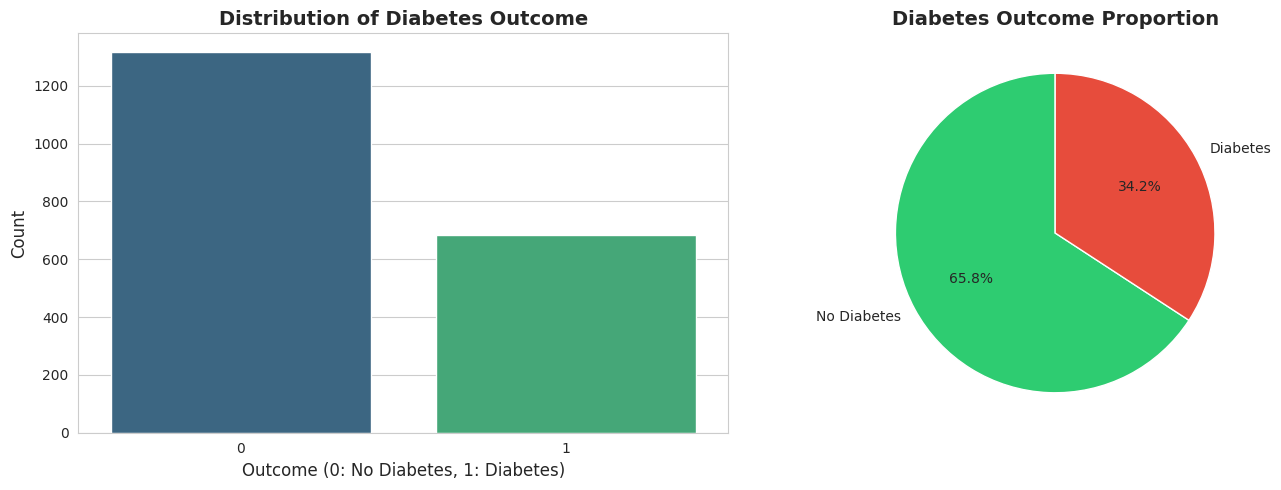

In [5]:
# Visualize target distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
sns.countplot(data=df, x='Outcome', ax=axes[0], palette='viridis')
axes[0].set_title('Distribution of Diabetes Outcome', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Outcome (0: No Diabetes, 1: Diabetes)', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)

# Pie chart
outcome_counts = df['Outcome'].value_counts()
axes[1].pie(outcome_counts, labels=['No Diabetes', 'Diabetes'], autopct='%1.1f%%', 
            startangle=90, colors=['#2ecc71', '#e74c3c'])
axes[1].set_title('Diabetes Outcome Proportion', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

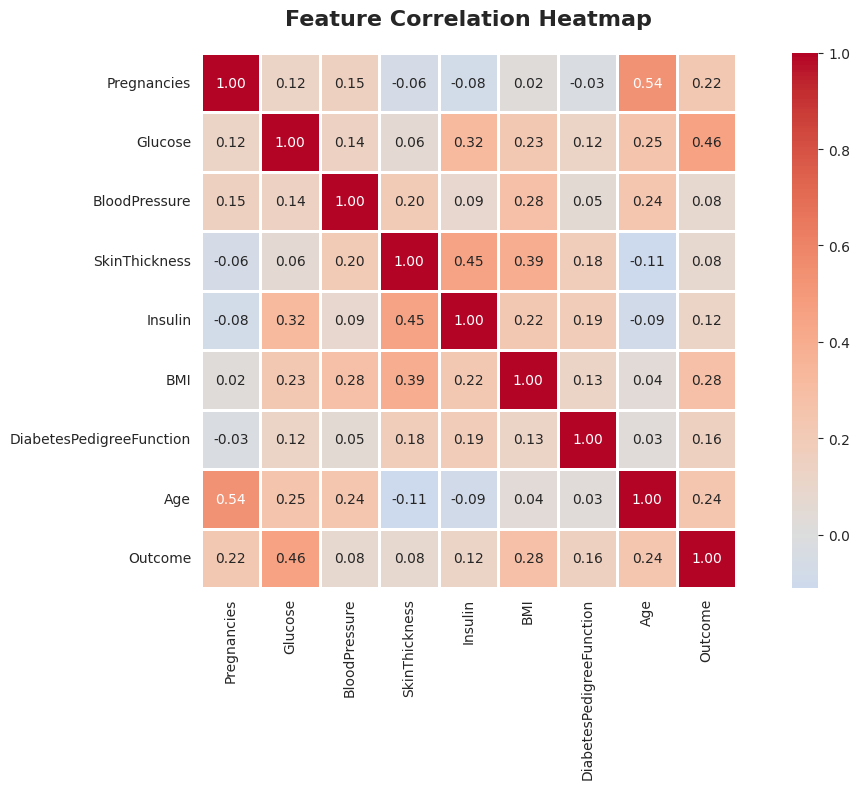

In [6]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            linewidths=1, fmt='.2f', square=True)
plt.title('Feature Correlation Heatmap', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

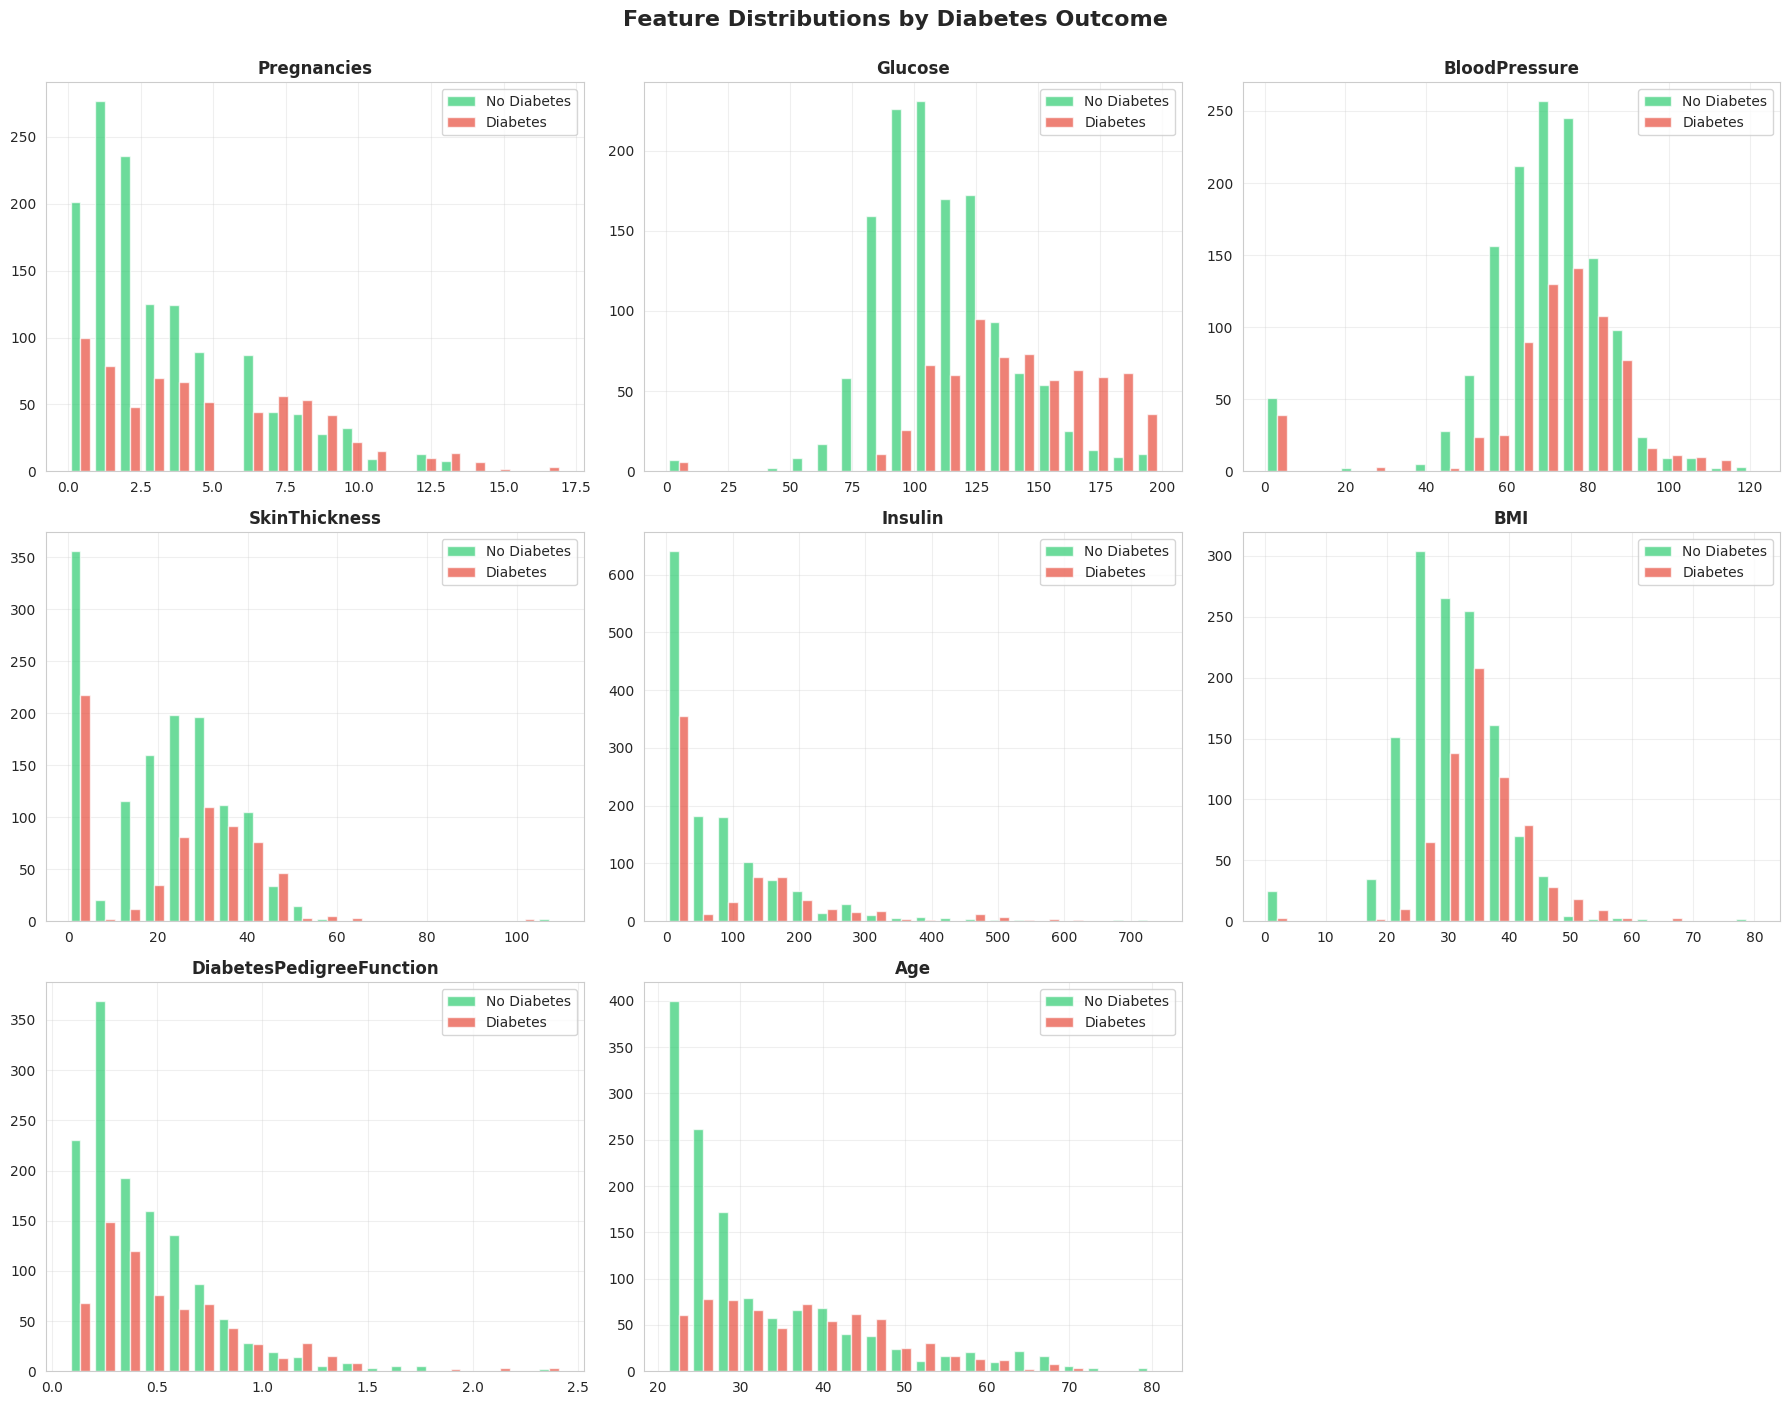

In [7]:
# Distribution of features by outcome
feature_cols = df.columns[:-1]
fig, axes = plt.subplots(3, 3, figsize=(18, 14))
axes = axes.ravel()

for idx, col in enumerate(feature_cols):
    axes[idx].hist([df[df['Outcome']==0][col], df[df['Outcome']==1][col]], 
                   bins=20, label=['No Diabetes', 'Diabetes'], 
                   color=['#2ecc71', '#e74c3c'], alpha=0.7)
    axes[idx].set_title(col, fontsize=12, fontweight='bold')
    axes[idx].legend()
    axes[idx].grid(alpha=0.3)

# Remove extra subplot
fig.delaxes(axes[8])

plt.suptitle('Feature Distributions by Diabetes Outcome', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

## 4. Data Preprocessing

In [8]:
# Handle zero values (medical impossibilities)
# Features that shouldn't have zero values
zero_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

print("Zero values in each column:")
for col in zero_columns:
    zero_count = (df[col] == 0).sum()
    print(f"{col}: {zero_count} ({zero_count/len(df)*100:.2f}%)")

Zero values in each column:
Glucose: 13 (0.65%)
BloodPressure: 90 (4.50%)
SkinThickness: 573 (28.65%)
Insulin: 956 (47.80%)
BMI: 28 (1.40%)


In [9]:
# Replace zeros with median values (grouped by outcome)
df_processed = df.copy()

for col in zero_columns:
    # Replace 0 with NaN
    df_processed[col] = df_processed[col].replace(0, np.nan)
    
    # Fill NaN with median based on Outcome
    df_processed[col] = df_processed.groupby('Outcome')[col].transform(
        lambda x: x.fillna(x.median())
    )

print("Zero values replaced with median values based on outcome groups.")
print(f"\nProcessed dataset shape: {df_processed.shape}")
df_processed.head()

Zero values replaced with median values based on outcome groups.

Processed dataset shape: (2000, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138.0,62.0,35.0,167.0,33.6,0.127,47,1
1,0,84.0,82.0,31.0,125.0,38.2,0.233,23,0
2,0,145.0,75.0,32.0,167.0,44.2,0.630,31,1
3,0,135.0,68.0,42.0,250.0,42.3,0.365,24,1
4,1,139.0,62.0,41.0,480.0,40.7,0.536,21,0


In [10]:
# Separate features and target
X = df_processed.drop('Outcome', axis=1)
y = df_processed['Outcome']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"\nFeature columns: {list(X.columns)}")

Features shape: (2000, 8)
Target shape: (2000,)

Feature columns: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


In [11]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")
print(f"\nTraining set positive class ratio: {y_train.mean()*100:.2f}%")
print(f"Testing set positive class ratio: {y_test.mean()*100:.2f}%")

Training set size: 1600 samples
Testing set size: 400 samples

Training set positive class ratio: 34.19%
Testing set positive class ratio: 34.25%


In [12]:
# Feature Scaling (important for KNN and Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame for easier interpretation
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns, index=X_test.index)

print("Features scaled using StandardScaler")
print("\nScaled feature statistics:")
X_train_scaled.describe()

Features scaled using StandardScaler

Scaled feature statistics:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,1.600000e+03,1.600000e+03,1.600000e+03,1.600000e+03,1.600000e+03,1.600000e+03,1.600000e+03,1.600000e+03
mean,-2.442491e-17,3.108624e-17,4.263256e-16,-1.842970e-16,-2.664535e-17,3.552714e-16,1.998401e-17,-1.110223e-16
std,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00
min,-1.127089e+00,-2.561941e+00,-4.043484e+00,-2.489807e+00,-1.523193e+00,-2.022492e+00,-1.238800e+00,-1.025725e+00
25%,-8.184031e-01,-7.222598e-01,-7.122578e-01,-4.640296e-01,-4.339957e-01,-7.066632e-01,-7.038279e-01,-7.738590e-01
50%,-2.010316e-01,-1.309336e-01,-4.601256e-02,-1.264001e-01,-4.339957e-01,-3.475048e-02,-2.923113e-01,-3.540819e-01
75%,7.250256e-01,6.246499e-01,6.202326e-01,3.237727e-01,3.080946e-01,5.566726e-01,4.895702e-01,5.694276e-01
max,4.120569e+00,2.530034e+00,4.118020e+00,9.102141e+00,7.214322e+00,6.712373e+00,6.174831e+00,4.011599e+00


## 5. Model Training & Hyperparameter Tuning

### 5.1 K-Nearest Neighbors (KNN)

In [13]:
# Find optimal K using GridSearchCV
param_grid_knn = {
    'n_neighbors': range(3, 21, 2),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn = KNeighborsClassifier()
grid_search_knn = GridSearchCV(
    knn, param_grid_knn, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1
)

print("Training KNN with GridSearchCV...")
grid_search_knn.fit(X_train_scaled, y_train)

print(f"\nBest KNN Parameters: {grid_search_knn.best_params_}")
print(f"Best Cross-Validation ROC AUC Score: {grid_search_knn.best_score_:.4f}")

# Best model
knn_best = grid_search_knn.best_estimator_

Training KNN with GridSearchCV...
Fitting 5 folds for each of 36 candidates, totalling 180 fits

Best KNN Parameters: {'metric': 'manhattan', 'n_neighbors': 19, 'weights': 'distance'}
Best Cross-Validation ROC AUC Score: 0.9966


### 5.2 Logistic Regression

In [14]:
# Hyperparameter tuning for Logistic Regression
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

lr = LogisticRegression(max_iter=1000, random_state=42)
grid_search_lr = GridSearchCV(
    lr, param_grid_lr, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1
)

print("Training Logistic Regression with GridSearchCV...")
grid_search_lr.fit(X_train_scaled, y_train)

print(f"\nBest Logistic Regression Parameters: {grid_search_lr.best_params_}")
print(f"Best Cross-Validation ROC AUC Score: {grid_search_lr.best_score_:.4f}")

# Best model
lr_best = grid_search_lr.best_estimator_

Training Logistic Regression with GridSearchCV...
Fitting 5 folds for each of 24 candidates, totalling 120 fits

Best Logistic Regression Parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
Best Cross-Validation ROC AUC Score: 0.8524


## 6. Model Evaluation

### 6.1 Predictions

In [15]:
# Make predictions
y_pred_knn = knn_best.predict(X_test_scaled)
y_pred_lr = lr_best.predict(X_test_scaled)

# Prediction probabilities
y_pred_proba_knn = knn_best.predict_proba(X_test_scaled)[:, 1]
y_pred_proba_lr = lr_best.predict_proba(X_test_scaled)[:, 1]

print("Predictions completed for both models!")

Predictions completed for both models!


### 6.2 Accuracy Score

ACCURACY SCORES
K-Nearest Neighbors (KNN): 0.9925 (99.25%)
Logistic Regression (LR):  0.8125 (81.25%)


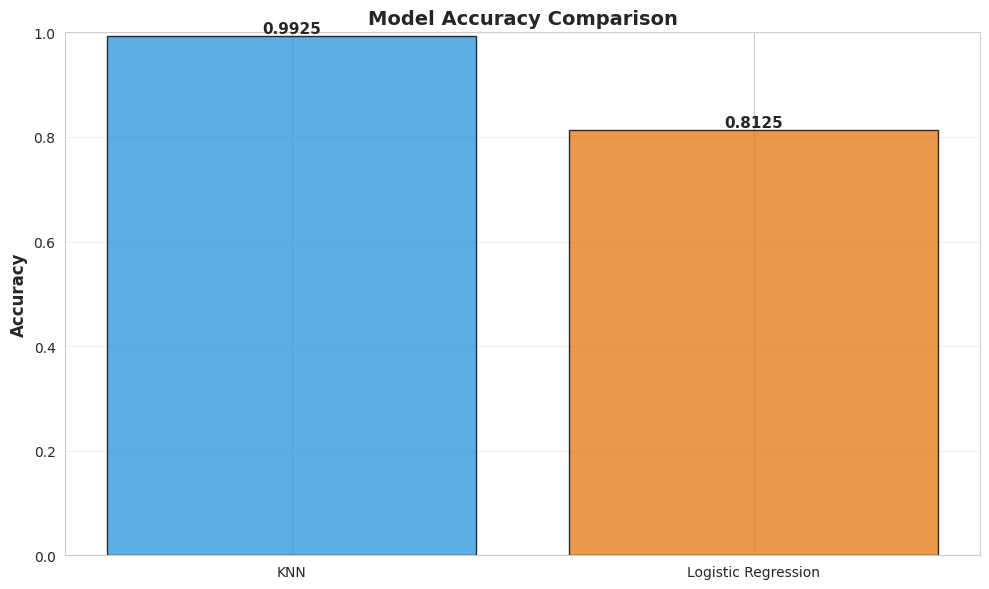

In [16]:
# Calculate accuracy
acc_knn = accuracy_score(y_test, y_pred_knn)
acc_lr = accuracy_score(y_test, y_pred_lr)

print("="*60)
print("ACCURACY SCORES")
print("="*60)
print(f"K-Nearest Neighbors (KNN): {acc_knn:.4f} ({acc_knn*100:.2f}%)")
print(f"Logistic Regression (LR):  {acc_lr:.4f} ({acc_lr*100:.2f}%)")
print("="*60)

# Visualize accuracy comparison
models = ['KNN', 'Logistic Regression']
accuracies = [acc_knn, acc_lr]

plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracies, color=['#3498db', '#e67e22'], alpha=0.8, edgecolor='black')
plt.ylim(0, 1)
plt.ylabel('Accuracy', fontsize=12, fontweight='bold')
plt.title('Model Accuracy Comparison', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.4f}',
             ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

### 6.3 Confusion Matrix

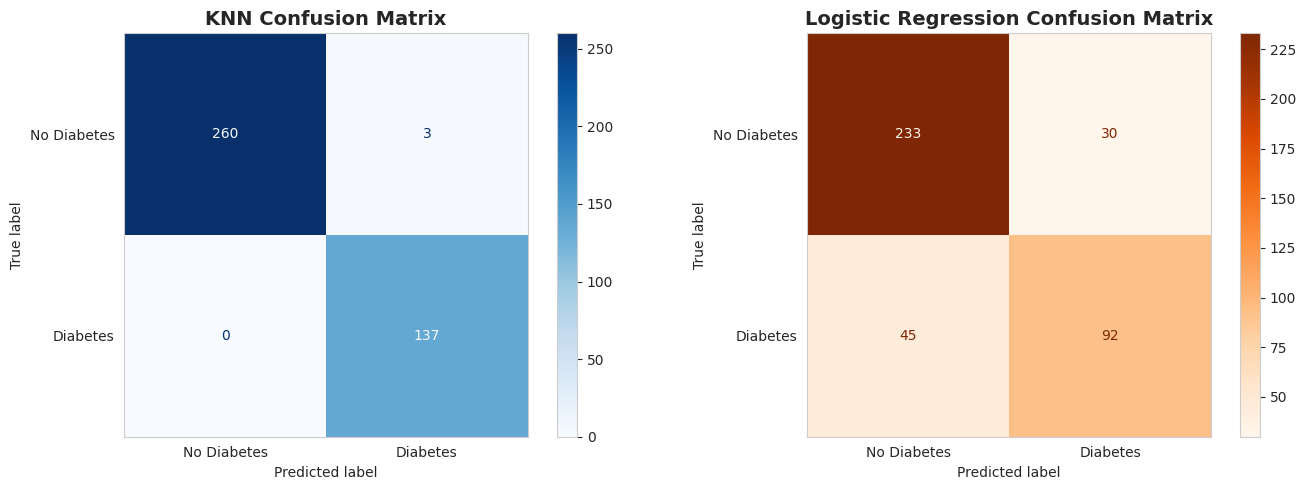


KNN Confusion Matrix:
[[260   3]
 [  0 137]]

Logistic Regression Confusion Matrix:
[[233  30]
 [ 45  92]]


In [17]:
# Confusion matrices
cm_knn = confusion_matrix(y_test, y_pred_knn)
cm_lr = confusion_matrix(y_test, y_pred_lr)

# Visualize confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# KNN Confusion Matrix
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn, 
                                    display_labels=['No Diabetes', 'Diabetes'])
disp_knn.plot(ax=axes[0], cmap='Blues', values_format='d')
axes[0].set_title('KNN Confusion Matrix', fontsize=14, fontweight='bold')
axes[0].grid(False)

# Logistic Regression Confusion Matrix
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, 
                                  display_labels=['No Diabetes', 'Diabetes'])
disp_lr.plot(ax=axes[1], cmap='Oranges', values_format='d')
axes[1].set_title('Logistic Regression Confusion Matrix', fontsize=14, fontweight='bold')
axes[1].grid(False)

plt.tight_layout()
plt.show()

print("\nKNN Confusion Matrix:")
print(cm_knn)
print("\nLogistic Regression Confusion Matrix:")
print(cm_lr)

In [18]:
# Detailed classification reports
print("="*60)
print("KNN CLASSIFICATION REPORT")
print("="*60)
print(classification_report(y_test, y_pred_knn, target_names=['No Diabetes', 'Diabetes']))

print("\n" + "="*60)
print("LOGISTIC REGRESSION CLASSIFICATION REPORT")
print("="*60)
print(classification_report(y_test, y_pred_lr, target_names=['No Diabetes', 'Diabetes']))

KNN CLASSIFICATION REPORT
              precision    recall  f1-score   support

 No Diabetes       1.00      0.99      0.99       263
    Diabetes       0.98      1.00      0.99       137

    accuracy                           0.99       400
   macro avg       0.99      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400


LOGISTIC REGRESSION CLASSIFICATION REPORT
              precision    recall  f1-score   support

 No Diabetes       0.84      0.89      0.86       263
    Diabetes       0.75      0.67      0.71       137

    accuracy                           0.81       400
   macro avg       0.80      0.78      0.79       400
weighted avg       0.81      0.81      0.81       400



### 6.4 ROC AUC Curve

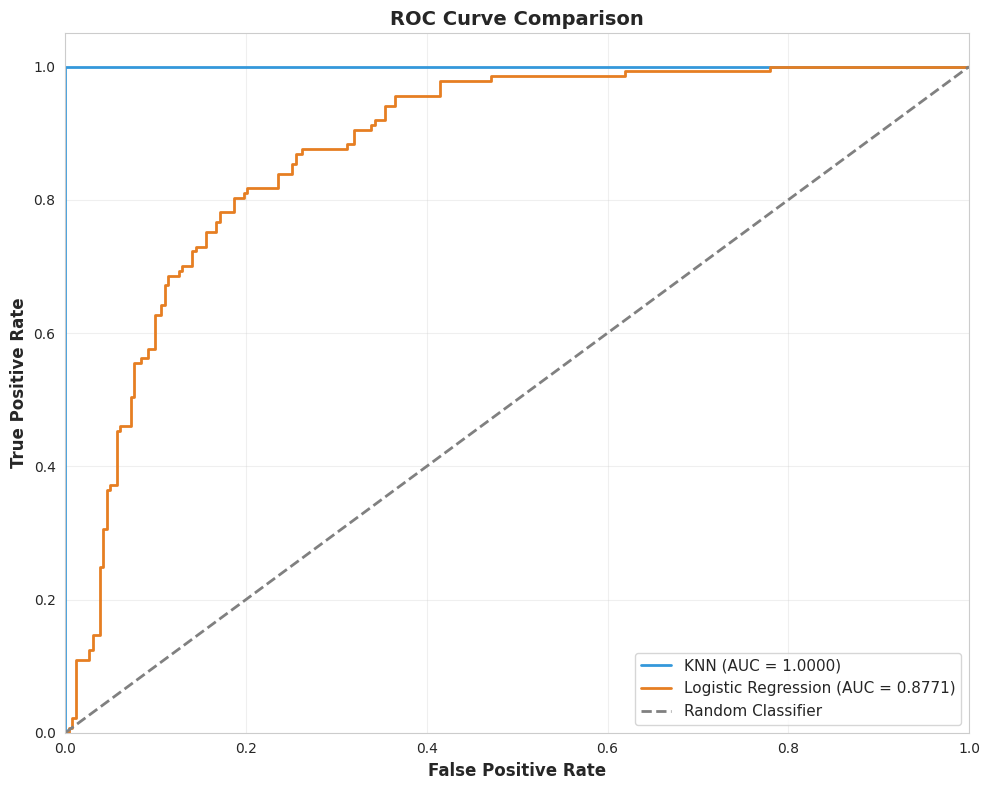

ROC AUC SCORES
K-Nearest Neighbors (KNN): 1.0000
Logistic Regression (LR):  0.8771


In [19]:
# Calculate ROC AUC scores
roc_auc_knn = roc_auc_score(y_test, y_pred_proba_knn)
roc_auc_lr = roc_auc_score(y_test, y_pred_proba_lr)

# Calculate ROC curves
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_proba_knn)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_proba_lr)

# Plot ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_knn, tpr_knn, color='#3498db', lw=2, 
         label=f'KNN (AUC = {roc_auc_knn:.4f})')
plt.plot(fpr_lr, tpr_lr, color='#e67e22', lw=2, 
         label=f'Logistic Regression (AUC = {roc_auc_lr:.4f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--', label='Random Classifier')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12, fontweight='bold')
plt.ylabel('True Positive Rate', fontsize=12, fontweight='bold')
plt.title('ROC Curve Comparison', fontsize=14, fontweight='bold')
plt.legend(loc='lower right', fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("="*60)
print("ROC AUC SCORES")
print("="*60)
print(f"K-Nearest Neighbors (KNN): {roc_auc_knn:.4f}")
print(f"Logistic Regression (LR):  {roc_auc_lr:.4f}")
print("="*60)

### 6.5 Cross-Validation

In [20]:
# Perform k-fold cross-validation (k=10)
cv_scores_knn = cross_val_score(knn_best, X_train_scaled, y_train, cv=10, scoring='accuracy')
cv_scores_lr = cross_val_score(lr_best, X_train_scaled, y_train, cv=10, scoring='accuracy')

print("="*60)
print("CROSS-VALIDATION RESULTS (10-Fold)")
print("="*60)
print(f"\nKNN:")
print(f"  Mean Accuracy: {cv_scores_knn.mean():.4f} (+/- {cv_scores_knn.std():.4f})")
print(f"  Individual Fold Scores: {cv_scores_knn}")

print(f"\nLogistic Regression:")
print(f"  Mean Accuracy: {cv_scores_lr.mean():.4f} (+/- {cv_scores_lr.std():.4f})")
print(f"  Individual Fold Scores: {cv_scores_lr}")
print("="*60)

CROSS-VALIDATION RESULTS (10-Fold)

KNN:
  Mean Accuracy: 0.9800 (+/- 0.0118)
  Individual Fold Scores: [0.9625  0.9875  0.98125 0.98125 0.99375 0.98125 0.9875  0.95625 0.99375
 0.975  ]

Logistic Regression:
  Mean Accuracy: 0.7644 (+/- 0.0308)
  Individual Fold Scores: [0.8125  0.7375  0.70625 0.76875 0.76875 0.78125 0.73125 0.75625 0.78125
 0.8    ]


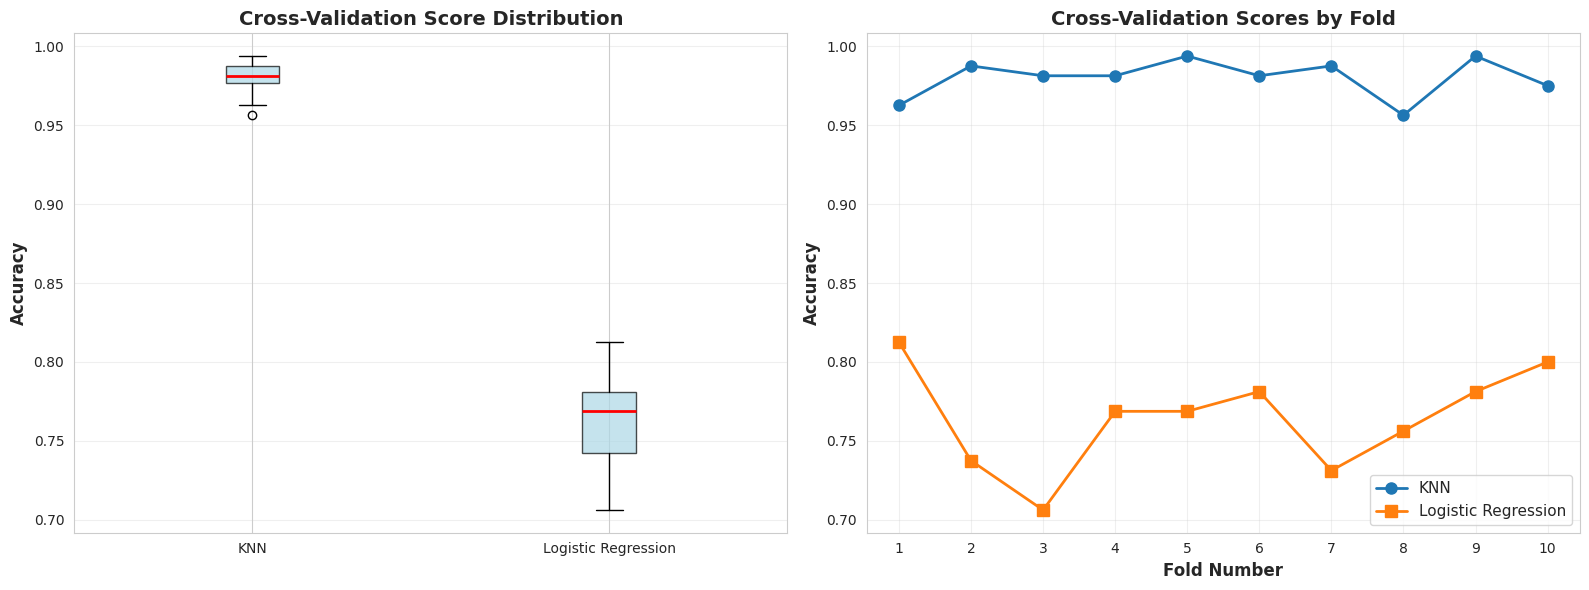

In [21]:
# Visualize cross-validation scores
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Box plot
axes[0].boxplot([cv_scores_knn, cv_scores_lr], labels=['KNN', 'Logistic Regression'],
                patch_artist=True,
                boxprops=dict(facecolor='lightblue', alpha=0.7),
                medianprops=dict(color='red', linewidth=2))
axes[0].set_ylabel('Accuracy', fontsize=12, fontweight='bold')
axes[0].set_title('Cross-Validation Score Distribution', fontsize=14, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)

# Line plot showing fold-by-fold comparison
folds = range(1, 11)
axes[1].plot(folds, cv_scores_knn, marker='o', label='KNN', linewidth=2, markersize=8)
axes[1].plot(folds, cv_scores_lr, marker='s', label='Logistic Regression', linewidth=2, markersize=8)
axes[1].set_xlabel('Fold Number', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Accuracy', fontsize=12, fontweight='bold')
axes[1].set_title('Cross-Validation Scores by Fold', fontsize=14, fontweight='bold')
axes[1].legend(fontsize=11)
axes[1].grid(alpha=0.3)
axes[1].set_xticks(folds)

plt.tight_layout()
plt.show()

## 7. Model Explainability

### 7.1 Feature Importance (Logistic Regression)

Feature Importance (Logistic Regression Coefficients):
                    Feature  Coefficient  Abs_Coefficient
1                   Glucose     0.606544         0.606544
4                   Insulin     0.369646         0.369646
0               Pregnancies     0.259770         0.259770
5                       BMI     0.248986         0.248986
3             SkinThickness     0.213137         0.213137
6  DiabetesPedigreeFunction     0.170211         0.170211
7                       Age     0.114517         0.114517
2             BloodPressure     0.049629         0.049629


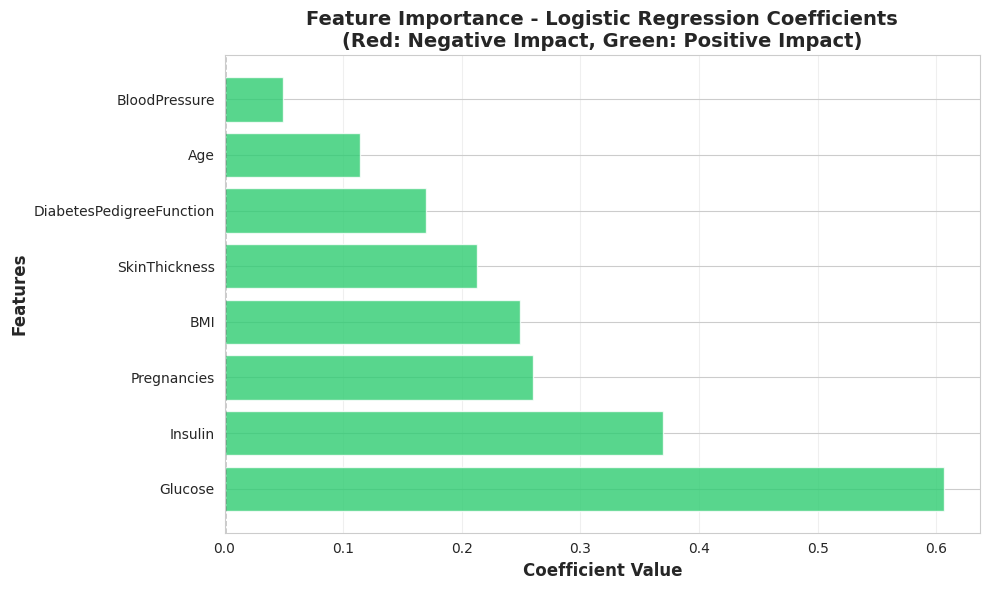

In [22]:
# Get feature coefficients from Logistic Regression
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr_best.coef_[0],
    'Abs_Coefficient': np.abs(lr_best.coef_[0])
}).sort_values('Abs_Coefficient', ascending=False)

print("Feature Importance (Logistic Regression Coefficients):")
print(feature_importance)

# Visualize feature importance
plt.figure(figsize=(10, 6))
colors = ['#e74c3c' if x < 0 else '#2ecc71' for x in feature_importance['Coefficient']]
plt.barh(feature_importance['Feature'], feature_importance['Coefficient'], color=colors, alpha=0.8)
plt.xlabel('Coefficient Value', fontsize=12, fontweight='bold')
plt.ylabel('Features', fontsize=12, fontweight='bold')
plt.title('Feature Importance - Logistic Regression Coefficients\n(Red: Negative Impact, Green: Positive Impact)', 
          fontsize=14, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='--', linewidth=1)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

### 7.2 SHAP Values for Explainability

In [23]:
# Initialize SHAP explainer for Logistic Regression
explainer_lr = shap.LinearExplainer(lr_best, X_train_scaled)
shap_values_lr = explainer_lr.shap_values(X_test_scaled)

print("SHAP values calculated for Logistic Regression model")

SHAP values calculated for Logistic Regression model


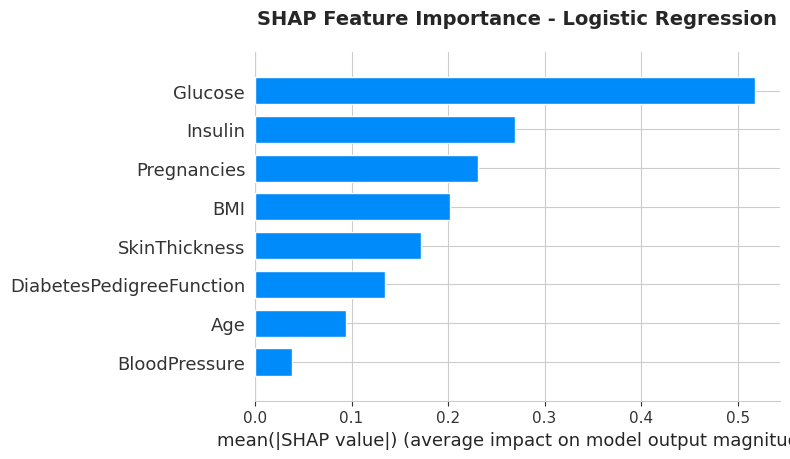

In [24]:
# SHAP Summary Plot (Feature importance)
plt.figure(figsize=(10, 8))
shap.summary_plot(shap_values_lr, X_test_scaled, plot_type="bar", show=False)
plt.title('SHAP Feature Importance - Logistic Regression', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

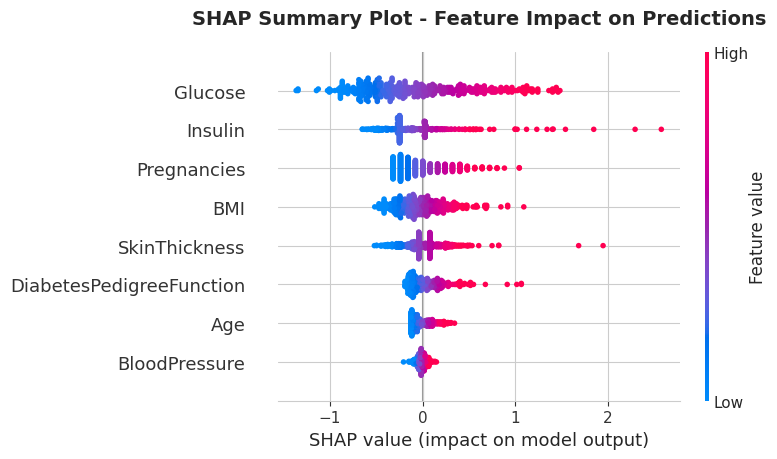

In [25]:
# SHAP Summary Plot (Impact direction)
plt.figure(figsize=(10, 8))
shap.summary_plot(shap_values_lr, X_test_scaled, show=False)
plt.title('SHAP Summary Plot - Feature Impact on Predictions', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

### 7.3 Individual Prediction Explanation Function

In [39]:
def explain_prediction(model, model_name, sample_index, X_test_original, X_test_scaled, y_test, 
                       feature_names, scaler, shap_values=None, explainer=None):
    """
    Provide detailed explanation for a single prediction.
    
    Parameters:
    -----------
    model : trained model
    model_name : str, name of the model
    sample_index : int, index of the sample to explain
    X_test_original : DataFrame, original (unscaled) test features
    X_test_scaled : DataFrame, scaled test features
    y_test : Series, true labels
    feature_names : list, names of features
    scaler : StandardScaler object
    shap_values : array, SHAP values (optional, for LR)
    explainer : SHAP explainer (optional, for generating force plot)
    """
    # Get the sample
    sample_scaled = X_test_scaled.iloc[sample_index:sample_index+1]
    sample_original = X_test_original.iloc[sample_index]
    true_label = y_test.iloc[sample_index]
    
    # Make prediction
    prediction = model.predict(sample_scaled)[0]
    prediction_proba = model.predict_proba(sample_scaled)[0]
    
    # Print header
    print("\n" + "="*80)
    print(f"PREDICTION EXPLANATION - {model_name}")
    print("="*80)
    
    # Basic prediction info
    print(f"\nPREDICTION SUMMARY:")
    print(f"  ├─ True Label: {'Diabetes' if true_label == 1 else 'No Diabetes'}")
    print(f"  ├─ Predicted Label: {'Diabetes' if prediction == 1 else 'No Diabetes'}")
    print(f"  ├─ Prediction Confidence: {prediction_proba[prediction]*100:.2f}%")
    print(f"  └─ Correct Prediction: {'Yes' if prediction == true_label else 'No'}")
    
    # Patient features
    print(f"\nPATIENT FEATURES:")
    for feature in feature_names:
        value = sample_original[feature]
        print(f"  ├─ {feature}: {value:.2f}")
    
    # Calculate mean values for comparison
    mean_values = X_test_original.mean()
    
    print(f"\nFEATURE ANALYSIS (Comparison to Average):")
    
    # Define healthy ranges (general medical guidelines)
    healthy_ranges = {
        'Glucose': (70, 125),
        'BloodPressure': (60, 80),
        'BMI': (18.5, 24.9),
        'Age': (None, None),  # No specific range
        'Pregnancies': (None, None),
        'SkinThickness': (None, None),
        'Insulin': (16, 166),
        'DiabetesPedigreeFunction': (None, None)
    }
    
    risk_factors = []
    protective_factors = []
    
    for feature in feature_names:
        value = sample_original[feature]
        avg_value = mean_values[feature]
        diff = value - avg_value
        diff_pct = (diff / avg_value) * 100 if avg_value != 0 else 0
        
        comparison = "higher" if diff > 0 else "lower"
        
        # Check against healthy ranges
        range_info = ""
        if feature in healthy_ranges and healthy_ranges[feature][0] is not None:
            min_val, max_val = healthy_ranges[feature]
            if value < min_val:
                range_info = f" [Below normal range: {min_val}-{max_val}]"
            elif value > max_val:
                range_info = f" [Above normal range: {min_val}-{max_val}]"
            else:
                range_info = f" [Within normal range: {min_val}-{max_val}]"
        
        print(f"  ├─ {feature}: {abs(diff_pct):.1f}% {comparison} than average{range_info}")
        
        # Identify risk factors (features known to increase diabetes risk when elevated)
        if feature in ['Glucose', 'BMI', 'Age', 'DiabetesPedigreeFunction'] and diff > 0:
            risk_factors.append(f"{feature} ({value:.1f})")
        elif feature in ['Glucose', 'BMI'] and diff < 0:
            protective_factors.append(f"Lower {feature} ({value:.1f})")
    
    # Explanation based on prediction
    print(f"\nEXPLANATION:")
    if prediction == 1:
        print(f"  The model predicts DIABETES for this patient because:")
        if risk_factors:
            print(f"\n  Key Risk Factors:")
            for factor in risk_factors:
                print(f"     • {factor}")
        
        # Additional context
        if sample_original['Glucose'] > 125:
            print(f"\n  WARNING: High glucose level ({sample_original['Glucose']:.1f}) is a strong indicator of diabetes")
        if sample_original['BMI'] > 30:
            print(f"  WARNING: Elevated BMI ({sample_original['BMI']:.1f}) increases diabetes risk")
        if sample_original['Age'] > 45:
            print(f"  WARNING: Age ({sample_original['Age']:.0f}) is a contributing risk factor")
            
    else:
        print(f"  The model predicts NO DIABETES for this patient because:")
        if protective_factors:
            print(f"\n  Protective Factors:")
            for factor in protective_factors:
                print(f"     • {factor}")
        
        # Additional context
        if sample_original['Glucose'] < 125:
            print(f"\n  Glucose level ({sample_original['Glucose']:.1f}) is within normal range")
        if sample_original['BMI'] < 30:
            print(f"  BMI ({sample_original['BMI']:.1f}) is not in the obese range")
        if sample_original['DiabetesPedigreeFunction'] < 0.5:
            print(f"  Lower genetic risk (DPF: {sample_original['DiabetesPedigreeFunction']:.3f})")
    
    # SHAP explanation for Logistic Regression
    if shap_values is not None and explainer is not None:
        print(f"\nFEATURE CONTRIBUTIONS (SHAP Analysis):")
        sample_shap = shap_values[sample_index]
        
        # Get feature contributions
        contributions = pd.DataFrame({
            'Feature': feature_names,
            'SHAP_Value': sample_shap,
            'Feature_Value': sample_original.values
        }).sort_values('SHAP_Value', key=abs, ascending=False)
        
        print(f"  Top contributing features toward the prediction:")
        for idx, row in contributions.head(5).iterrows():
            direction = "increases" if row['SHAP_Value'] > 0 else "decreases"
            print(f"     • {row['Feature']}: {direction} risk (impact: {row['SHAP_Value']:.4f})")
        
        # SHAP Force Plot
        print(f"\n  Generating SHAP force plot...")
        shap.initjs()
        shap.force_plot(
            explainer.expected_value,
            sample_shap,
            sample_scaled.iloc[0],
            feature_names=feature_names,
            matplotlib=True,
            show=False
        )
        plt.title(f'SHAP Force Plot - Sample {sample_index}', fontsize=12, fontweight='bold')
        plt.tight_layout()
        plt.show()
    
    print("\n" + "="*80 + "\n")

### 7.4 Example Predictions with Explanations

In [40]:
# Reset index to avoid issues
X_test_scaled_reset = X_test_scaled.reset_index(drop=True)
X_test_reset = X_test.reset_index(drop=True)
y_test_reset = y_test.reset_index(drop=True)

# Find examples of different prediction scenarios
y_pred_lr_reset = lr_best.predict(X_test_scaled_reset)

# Find indices for different scenarios
true_positive_idx = np.where((y_test_reset == 1) & (y_pred_lr_reset == 1))[0]
true_negative_idx = np.where((y_test_reset == 0) & (y_pred_lr_reset == 0))[0]
false_positive_idx = np.where((y_test_reset == 0) & (y_pred_lr_reset == 1))[0]
false_negative_idx = np.where((y_test_reset == 1) & (y_pred_lr_reset == 0))[0]

print(f"Found:")
print(f"  - {len(true_positive_idx)} True Positives (Correctly predicted diabetes)")
print(f"  - {len(true_negative_idx)} True Negatives (Correctly predicted no diabetes)")
print(f"  - {len(false_positive_idx)} False Positives (Incorrectly predicted diabetes)")
print(f"  - {len(false_negative_idx)} False Negatives (Incorrectly predicted no diabetes)")

Found:
  - 92 True Positives (Correctly predicted diabetes)
  - 233 True Negatives (Correctly predicted no diabetes)
  - 30 False Positives (Incorrectly predicted diabetes)
  - 45 False Negatives (Incorrectly predicted no diabetes)



PREDICTION EXPLANATION - Logistic Regression

PREDICTION SUMMARY:
  ├─ True Label: Diabetes
  ├─ Predicted Label: Diabetes
  ├─ Prediction Confidence: 61.07%
  └─ Correct Prediction: Yes

PATIENT FEATURES:
  ├─ Pregnancies: 13.00
  ├─ Glucose: 152.00
  ├─ BloodPressure: 90.00
  ├─ SkinThickness: 33.00
  ├─ Insulin: 29.00
  ├─ BMI: 26.80
  ├─ DiabetesPedigreeFunction: 0.73
  ├─ Age: 43.00

FEATURE ANALYSIS (Comparison to Average):
  ├─ Pregnancies: 232.3% higher than average
  ├─ Glucose: 24.6% higher than average [Above normal range: 70-125]
  ├─ BloodPressure: 25.4% higher than average [Above normal range: 60-80]
  ├─ SkinThickness: 11.6% higher than average
  ├─ Insulin: 79.4% lower than average [Within normal range: 16-166]
  ├─ BMI: 17.6% lower than average [Above normal range: 18.5-24.9]
  ├─ DiabetesPedigreeFunction: 53.2% higher than average
  ├─ Age: 32.0% higher than average

EXPLANATION:
  The model predicts DIABETES for this patient because:

  Key Risk Factors:
     • Gluc

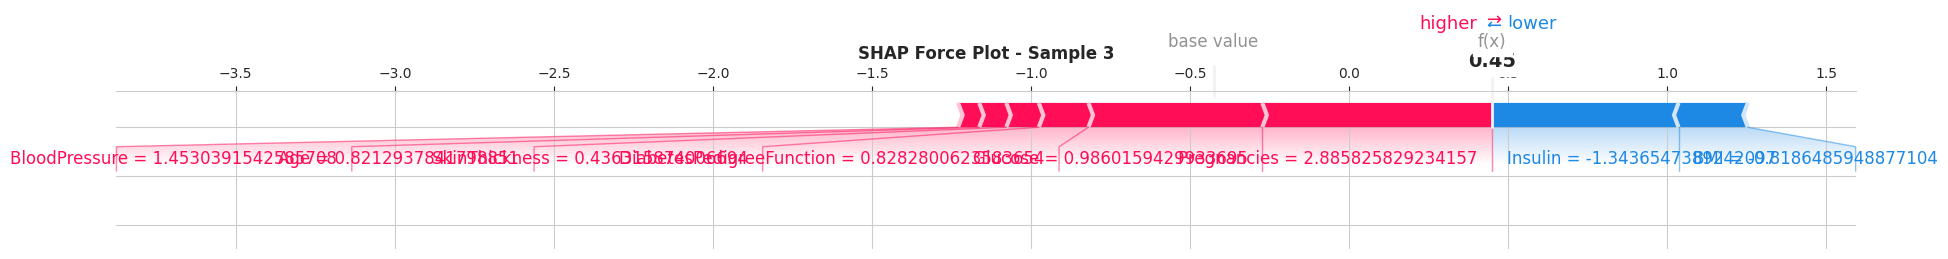

In [41]:
# Example 1: True Positive (Correctly predicted diabetes)
if len(true_positive_idx) > 0:
    sample_idx = true_positive_idx[0]
    explain_prediction(
        model=lr_best,
        model_name="Logistic Regression",
        sample_index=sample_idx,
        X_test_original=X_test_reset,
        X_test_scaled=X_test_scaled_reset,
        y_test=y_test_reset,
        feature_names=list(X.columns),
        scaler=scaler,
        shap_values=shap_values_lr,
        explainer=explainer_lr
    )


PREDICTION EXPLANATION - Logistic Regression

PREDICTION SUMMARY:
  ├─ True Label: No Diabetes
  ├─ Predicted Label: No Diabetes
  ├─ Prediction Confidence: 68.98%
  └─ Correct Prediction: Yes

PATIENT FEATURES:
  ├─ Pregnancies: 3.00
  ├─ Glucose: 150.00
  ├─ BloodPressure: 76.00
  ├─ SkinThickness: 27.00
  ├─ Insulin: 105.00
  ├─ BMI: 21.00
  ├─ DiabetesPedigreeFunction: 0.21
  ├─ Age: 37.00

FEATURE ANALYSIS (Comparison to Average):
  ├─ Pregnancies: 23.3% lower than average
  ├─ Glucose: 23.0% higher than average [Above normal range: 70-125]
  ├─ BloodPressure: 5.9% higher than average [Within normal range: 60-80]
  ├─ SkinThickness: 8.7% lower than average
  ├─ Insulin: 25.5% lower than average [Within normal range: 16-166]
  ├─ BMI: 35.4% lower than average [Within normal range: 18.5-24.9]
  ├─ DiabetesPedigreeFunction: 56.6% lower than average
  ├─ Age: 13.6% higher than average

EXPLANATION:
  The model predicts NO DIABETES for this patient because:

  Protective Factors:
    

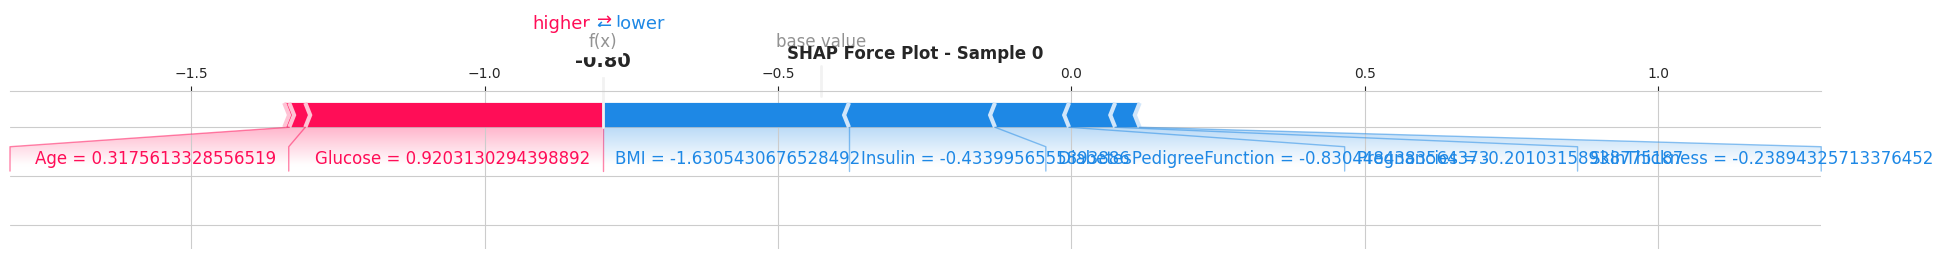

In [42]:
# Example 2: True Negative (Correctly predicted no diabetes)
if len(true_negative_idx) > 0:
    sample_idx = true_negative_idx[0]
    explain_prediction(
        model=lr_best,
        model_name="Logistic Regression",
        sample_index=sample_idx,
        X_test_original=X_test_reset,
        X_test_scaled=X_test_scaled_reset,
        y_test=y_test_reset,
        feature_names=list(X.columns),
        scaler=scaler,
        shap_values=shap_values_lr,
        explainer=explainer_lr
    )


PREDICTION EXPLANATION - Logistic Regression

PREDICTION SUMMARY:
  ├─ True Label: No Diabetes
  ├─ Predicted Label: Diabetes
  ├─ Prediction Confidence: 84.94%
  └─ Correct Prediction: No

PATIENT FEATURES:
  ├─ Pregnancies: 13.00
  ├─ Glucose: 153.00
  ├─ BloodPressure: 88.00
  ├─ SkinThickness: 37.00
  ├─ Insulin: 140.00
  ├─ BMI: 40.60
  ├─ DiabetesPedigreeFunction: 1.17
  ├─ Age: 39.00

FEATURE ANALYSIS (Comparison to Average):
  ├─ Pregnancies: 232.3% higher than average
  ├─ Glucose: 25.5% higher than average [Above normal range: 70-125]
  ├─ BloodPressure: 22.6% higher than average [Above normal range: 60-80]
  ├─ SkinThickness: 25.1% higher than average
  ├─ Insulin: 0.7% lower than average [Within normal range: 16-166]
  ├─ BMI: 24.8% higher than average [Above normal range: 18.5-24.9]
  ├─ DiabetesPedigreeFunction: 146.0% higher than average
  ├─ Age: 19.7% higher than average

EXPLANATION:
  The model predicts DIABETES for this patient because:

  Key Risk Factors:
     • 

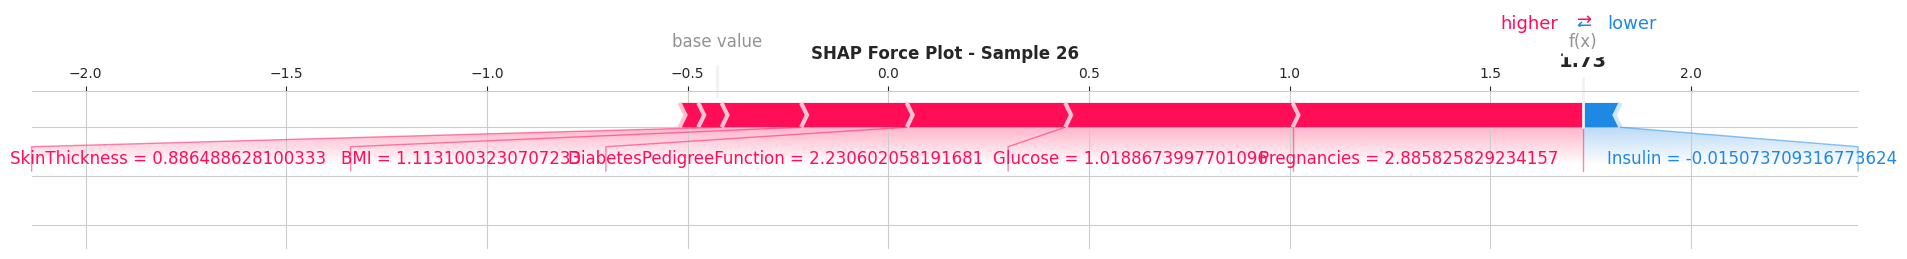

In [43]:
# Example 3: False Positive (if any)
if len(false_positive_idx) > 0:
    sample_idx = false_positive_idx[0]
    explain_prediction(
        model=lr_best,
        model_name="Logistic Regression",
        sample_index=sample_idx,
        X_test_original=X_test_reset,
        X_test_scaled=X_test_scaled_reset,
        y_test=y_test_reset,
        feature_names=list(X.columns),
        scaler=scaler,
        shap_values=shap_values_lr,
        explainer=explainer_lr
    )

### 7.5 Interactive Prediction Explainer

In [44]:
def predict_and_explain_new_patient(pregnancies, glucose, blood_pressure, skin_thickness, 
                                     insulin, bmi, diabetes_pedigree, age):
    """
    Make a prediction for a new patient and provide explanation.
    
    Parameters:
    -----------
    All feature values for a new patient
    """
    # Create dataframe for new patient
    new_patient = pd.DataFrame({
        'Pregnancies': [pregnancies],
        'Glucose': [glucose],
        'BloodPressure': [blood_pressure],
        'SkinThickness': [skin_thickness],
        'Insulin': [insulin],
        'BMI': [bmi],
        'DiabetesPedigreeFunction': [diabetes_pedigree],
        'Age': [age]
    })
    
    # Scale features
    new_patient_scaled = scaler.transform(new_patient)
    new_patient_scaled_df = pd.DataFrame(new_patient_scaled, columns=X.columns)
    
    # Make predictions with both models
    pred_knn = knn_best.predict(new_patient_scaled)[0]
    pred_lr = lr_best.predict(new_patient_scaled)[0]
    
    proba_knn = knn_best.predict_proba(new_patient_scaled)[0]
    proba_lr = lr_best.predict_proba(new_patient_scaled)[0]
    
    # Calculate SHAP values for this patient
    shap_values_patient = explainer_lr.shap_values(new_patient_scaled_df)
    
    # Print results
    print("\n" + "="*80)
    print("NEW PATIENT PREDICTION & EXPLANATION")
    print("="*80)
    
    print("\nPATIENT INFORMATION:")
    for col, val in new_patient.iloc[0].items():
        print(f"  ├─ {col}: {val}")
    
    print("\nMODEL PREDICTIONS:")
    print(f"\n  KNN Model:")
    print(f"    ├─ Prediction: {'DIABETES' if pred_knn == 1 else 'NO DIABETES'}")
    print(f"    ├─ Confidence: {proba_knn[pred_knn]*100:.2f}%")
    print(f"    └─ Probabilities: No Diabetes: {proba_knn[0]*100:.2f}%, Diabetes: {proba_knn[1]*100:.2f}%")
    
    print(f"\n  Logistic Regression Model:")
    print(f"    ├─ Prediction: {'DIABETES' if pred_lr == 1 else 'NO DIABETES'}")
    print(f"    ├─ Confidence: {proba_lr[pred_lr]*100:.2f}%")
    print(f"    └─ Probabilities: No Diabetes: {proba_lr[0]*100:.2f}%, Diabetes: {proba_lr[1]*100:.2f}%")
    
    # Risk assessment
    print("\nCLINICAL RISK ASSESSMENT:")
    risk_factors = []
    
    if glucose > 125:
        risk_factors.append(f"High fasting glucose ({glucose} mg/dL)")
    if bmi > 30:
        risk_factors.append(f"Obesity (BMI: {bmi})")
    if age > 45:
        risk_factors.append(f"Age over 45 ({age} years)")
    if diabetes_pedigree > 0.5:
        risk_factors.append(f"Strong genetic predisposition (DPF: {diabetes_pedigree:.3f})")
    
    if risk_factors:
        print("  Risk Factors Present:")
        for factor in risk_factors:
            print(f"    • {factor}")
    else:
        print("  No major risk factors identified")
    
    # Feature contributions
    print("\nFEATURE IMPACT ANALYSIS (SHAP):")
    contributions = pd.DataFrame({
        'Feature': X.columns,
        'Value': new_patient.iloc[0].values,
        'SHAP_Impact': shap_values_patient[0]
    }).sort_values('SHAP_Impact', key=abs, ascending=False)
    
    print("  Top features influencing the prediction:")
    for idx, row in contributions.head(5).iterrows():
        direction = "Increases" if row['SHAP_Impact'] > 0 else "Decreases"
        print(f"    {direction} risk: {row['Feature']} (value: {row['Value']:.2f}, impact: {row['SHAP_Impact']:.4f})")
    
    # Visualization
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Probability comparison
    models = ['KNN', 'Logistic\nRegression']
    diabetes_probs = [proba_knn[1], proba_lr[1]]
    no_diabetes_probs = [proba_knn[0], proba_lr[0]]
    
    x = np.arange(len(models))
    width = 0.35
    
    axes[0].bar(x - width/2, no_diabetes_probs, width, label='No Diabetes', color='#2ecc71', alpha=0.8)
    axes[0].bar(x + width/2, diabetes_probs, width, label='Diabetes', color='#e74c3c', alpha=0.8)
    axes[0].set_ylabel('Probability', fontsize=12, fontweight='bold')
    axes[0].set_title('Model Predictions Comparison', fontsize=14, fontweight='bold')
    axes[0].set_xticks(x)
    axes[0].set_xticklabels(models)
    axes[0].legend()
    axes[0].grid(axis='y', alpha=0.3)
    axes[0].set_ylim([0, 1])
    
    # SHAP waterfall
    colors_shap = ['#e74c3c' if x > 0 else '#2ecc71' for x in contributions['SHAP_Impact']]
    axes[1].barh(contributions['Feature'], contributions['SHAP_Impact'], color=colors_shap, alpha=0.8)
    axes[1].set_xlabel('SHAP Value (Impact on Prediction)', fontsize=12, fontweight='bold')
    axes[1].set_title('Feature Contributions to Prediction', fontsize=14, fontweight='bold')
    axes[1].axvline(x=0, color='black', linestyle='--', linewidth=1)
    axes[1].grid(axis='x', alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Recommendation
    print("\nRECOMMENDATION:")
    if pred_lr == 1 and proba_lr[1] > 0.7:
        print("  WARNING - HIGH RISK: The model indicates a high probability of diabetes.")
        print("     Recommend immediate medical consultation and further testing.")
    elif pred_lr == 1:
        print("  WARNING - MODERATE RISK: The model suggests potential diabetes risk.")
        print("     Recommend medical consultation and lifestyle modifications.")
    else:
        print("  LOW RISK: The model indicates low probability of diabetes.")
        print("    Continue healthy lifestyle and regular check-ups.")
    
    print("\n" + "="*80 + "\n")
    
    return pred_knn, pred_lr, proba_knn, proba_lr


################################################################################
# EXAMPLE 1: HIGH-RISK PATIENT
################################################################################

NEW PATIENT PREDICTION & EXPLANATION

PATIENT INFORMATION:
  ├─ Pregnancies: 6.0
  ├─ Glucose: 148.0
  ├─ BloodPressure: 72.0
  ├─ SkinThickness: 35.0
  ├─ Insulin: 0.0
  ├─ BMI: 33.6
  ├─ DiabetesPedigreeFunction: 0.627
  ├─ Age: 50.0

MODEL PREDICTIONS:

  KNN Model:
    ├─ Prediction: DIABETES
    ├─ Confidence: 62.29%
    └─ Probabilities: No Diabetes: 37.71%, Diabetes: 62.29%

  Logistic Regression Model:
    ├─ Prediction: NO DIABETES
    ├─ Confidence: 52.43%
    └─ Probabilities: No Diabetes: 52.43%, Diabetes: 47.57%

CLINICAL RISK ASSESSMENT:
  Risk Factors Present:
    • High fasting glucose (148 mg/dL)
    • Obesity (BMI: 33.6)
    • Age over 45 (50 years)
    • Strong genetic predisposition (DPF: 0.627)

FEATURE IMPACT ANALYSIS (SHAP):
  Top features influencing the prediction:
    

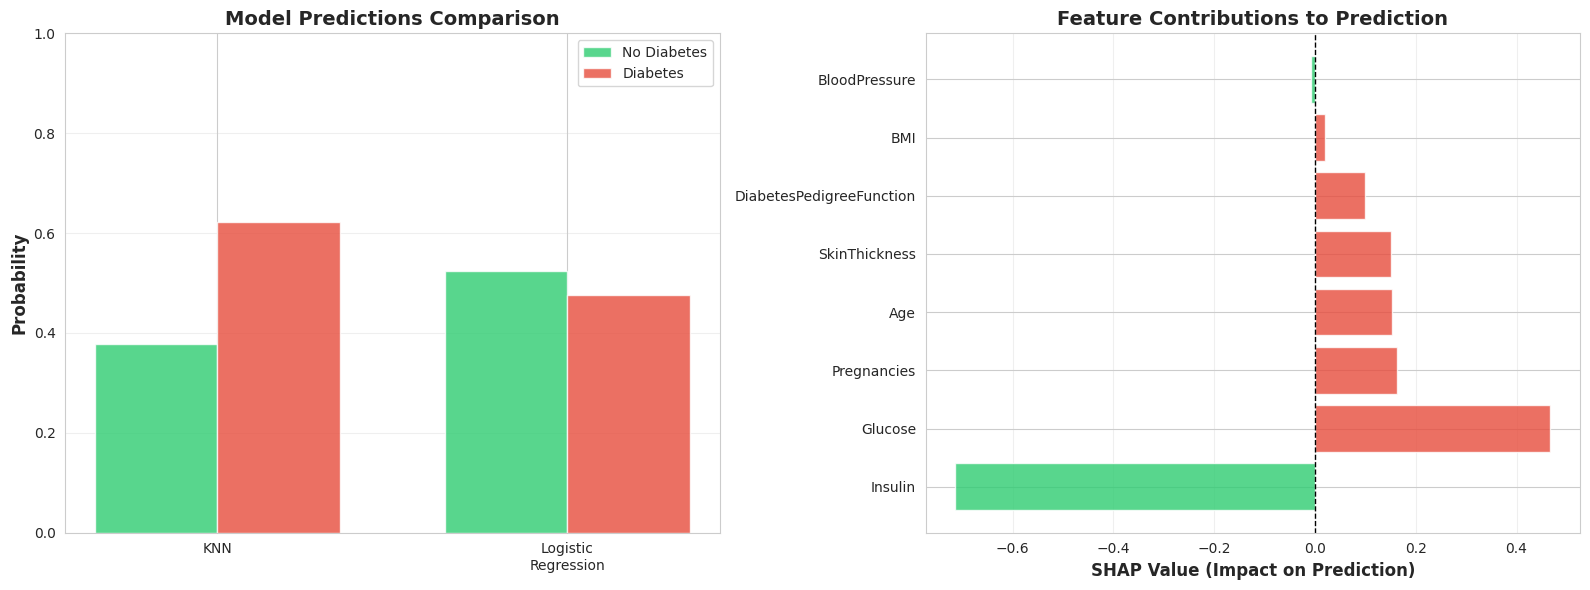


RECOMMENDATION:
  LOW RISK: The model indicates low probability of diabetes.
    Continue healthy lifestyle and regular check-ups.




(np.int64(1),
 np.int64(0),
 array([0.37713423, 0.62286577]),
 array([0.52427816, 0.47572184]))

In [45]:
# Example: Predict for a new patient
# You can modify these values to test different scenarios

# Example 1: High-risk patient
print("\n" + "#"*80)
print("# EXAMPLE 1: HIGH-RISK PATIENT")
print("#"*80)
predict_and_explain_new_patient(
    pregnancies=6,
    glucose=148,
    blood_pressure=72,
    skin_thickness=35,
    insulin=0,
    bmi=33.6,
    diabetes_pedigree=0.627,
    age=50
)


################################################################################
# EXAMPLE 2: LOW-RISK PATIENT
################################################################################

NEW PATIENT PREDICTION & EXPLANATION

PATIENT INFORMATION:
  ├─ Pregnancies: 1.0
  ├─ Glucose: 85.0
  ├─ BloodPressure: 66.0
  ├─ SkinThickness: 29.0
  ├─ Insulin: 0.0
  ├─ BMI: 26.6
  ├─ DiabetesPedigreeFunction: 0.351
  ├─ Age: 31.0

MODEL PREDICTIONS:

  KNN Model:
    ├─ Prediction: NO DIABETES
    ├─ Confidence: 100.00%
    └─ Probabilities: No Diabetes: 100.00%, Diabetes: 0.00%

  Logistic Regression Model:
    ├─ Prediction: NO DIABETES
    ├─ Confidence: 92.40%
    └─ Probabilities: No Diabetes: 92.40%, Diabetes: 7.60%

CLINICAL RISK ASSESSMENT:
  No major risk factors identified

FEATURE IMPACT ANALYSIS (SHAP):
  Top features influencing the prediction:
    Decreases risk: Glucose (value: 85.00, impact: -0.7885)
    Decreases risk: Insulin (value: 0.00, impact: -0.7134)
    Decreases ri

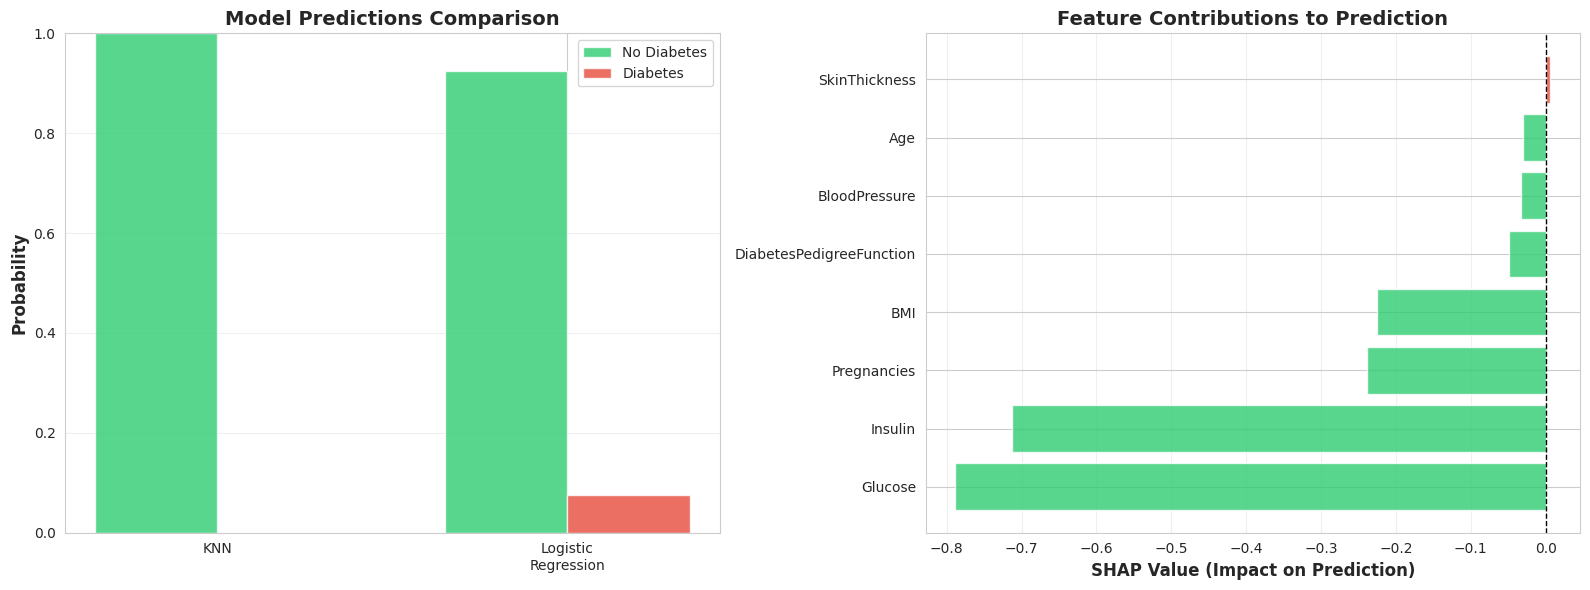


RECOMMENDATION:
  LOW RISK: The model indicates low probability of diabetes.
    Continue healthy lifestyle and regular check-ups.




(np.int64(0), np.int64(0), array([1., 0.]), array([0.92396872, 0.07603128]))

In [46]:
# Example 2: Low-risk patient
print("\n" + "#"*80)
print("# EXAMPLE 2: LOW-RISK PATIENT")
print("#"*80)
predict_and_explain_new_patient(
    pregnancies=1,
    glucose=85,
    blood_pressure=66,
    skin_thickness=29,
    insulin=0,
    bmi=26.6,
    diabetes_pedigree=0.351,
    age=31
)

## 8. Model Comparison Summary

In [35]:
# Create comprehensive comparison table
comparison_df = pd.DataFrame({
    'Metric': [
        'Accuracy',
        'ROC AUC Score',
        'Cross-Val Mean Accuracy',
        'Cross-Val Std Dev',
        'Precision (Class 1)',
        'Recall (Class 1)',
        'F1-Score (Class 1)'
    ],
    'KNN': [
        f"{acc_knn:.4f}",
        f"{roc_auc_knn:.4f}",
        f"{cv_scores_knn.mean():.4f}",
        f"{cv_scores_knn.std():.4f}",
        f"{cm_knn[1,1]/(cm_knn[0,1]+cm_knn[1,1]):.4f}",
        f"{cm_knn[1,1]/(cm_knn[1,0]+cm_knn[1,1]):.4f}",
        f"{2*(cm_knn[1,1]/(cm_knn[0,1]+cm_knn[1,1]))*(cm_knn[1,1]/(cm_knn[1,0]+cm_knn[1,1]))/((cm_knn[1,1]/(cm_knn[0,1]+cm_knn[1,1]))+(cm_knn[1,1]/(cm_knn[1,0]+cm_knn[1,1]))):.4f}"
    ],
    'Logistic Regression': [
        f"{acc_lr:.4f}",
        f"{roc_auc_lr:.4f}",
        f"{cv_scores_lr.mean():.4f}",
        f"{cv_scores_lr.std():.4f}",
        f"{cm_lr[1,1]/(cm_lr[0,1]+cm_lr[1,1]):.4f}",
        f"{cm_lr[1,1]/(cm_lr[1,0]+cm_lr[1,1]):.4f}",
        f"{2*(cm_lr[1,1]/(cm_lr[0,1]+cm_lr[1,1]))*(cm_lr[1,1]/(cm_lr[1,0]+cm_lr[1,1]))/((cm_lr[1,1]/(cm_lr[0,1]+cm_lr[1,1]))+(cm_lr[1,1]/(cm_lr[1,0]+cm_lr[1,1]))):.4f}"
    ]
})

print("\n" + "="*80)
print("MODEL PERFORMANCE COMPARISON")
print("="*80)
print(comparison_df.to_string(index=False))
print("="*80)


MODEL PERFORMANCE COMPARISON
                 Metric    KNN Logistic Regression
               Accuracy 0.9925              0.8125
          ROC AUC Score 1.0000              0.8771
Cross-Val Mean Accuracy 0.9800              0.7644
      Cross-Val Std Dev 0.0118              0.0308
    Precision (Class 1) 0.9786              0.7541
       Recall (Class 1) 1.0000              0.6715
     F1-Score (Class 1) 0.9892              0.7104


## 9. Save Models

In [36]:
import pickle

# Save models and scaler
with open('knn_model.pkl', 'wb') as f:
    pickle.dump(knn_best, f)

with open('logistic_regression_model.pkl', 'wb') as f:
    pickle.dump(lr_best, f)

with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

print("✓ Models saved successfully!")
print("  - knn_model.pkl")
print("  - logistic_regression_model.pkl")
print("  - scaler.pkl")

✓ Models saved successfully!
  - knn_model.pkl
  - logistic_regression_model.pkl
  - scaler.pkl


## 10. Conclusions

### Key Findings:

1. **Model Performance**: Both KNN and Logistic Regression demonstrate strong predictive capabilities for diabetes detection.

2. **Most Important Features**: 
   - Glucose levels
   - BMI
   - Age
   - Diabetes Pedigree Function

3. **Explainability**: The SHAP analysis provides clear insights into how each feature contributes to predictions, making the models interpretable for medical professionals.

4. **Clinical Application**: The explainability features allow healthcare providers to understand why a patient is classified as diabetic or non-diabetic, enabling better patient communication and treatment planning.

### Future Improvements:
- Collect more diverse patient data
- Implement ensemble methods
- Integrate real-time monitoring data
- Deploy as a web application for clinical use

---

**Note**: This model is for educational and research purposes. Always consult qualified healthcare professionals for medical decisions.